## univariate prediction for kyoto

In [39]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
from chronos import BaseChronosPipeline, Chronos2Pipeline

# Load the Chronos-2 pipeline
# GPU recommended for faster inference, but CPU is also supported
pipeline: Chronos2Pipeline = BaseChronosPipeline.from_pretrained("amazon/chronos-2", device_map="cuda")

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 2a4477f5-bb85-4b37-927b-5c4a7a0ce954)')' thrown while requesting HEAD https://huggingface.co/api/resolve-cache/models/amazon/chronos-2/e19c427c73837c00b5e932da5fbfede2929677ce/config.json
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 8c2a7b82-cb91-4997-9d1d-126f85628c52)')' thrown while requesting HEAD https://huggingface.co/amazon/chronos-2/resolve/main/model.safetensors
Retrying in 1s [Retry 1/5].


In [272]:
df = pd.read_csv('data/kyoto.csv')#,index_col='year')
df = df[df['year']>1677]
df.reset_index(drop=True)

,location,lat,long,alt,year,bloom_date,bloom_doy
0,kyoto,35.011983,135.676114,44,1678,1678-04-19,109
1,kyoto,35.011983,135.676114,44,1679,1679-04-24,114
2,kyoto,35.011983,135.676114,44,1680,1680-04-18,109
3,kyoto,35.011983,135.676114,44,1681,1681-04-20,110
4,kyoto,35.011983,135.676114,44,1682,1682-04-14,104
...,...,...,...,...,...,...,...
333,kyoto,35.011983,135.676114,44,2020,2020-04-01,92
334,kyoto,35.011983,135.676114,44,2021,2021-03-26,85
335,kyoto,35.011983,135.676114,44,2022,2022-04-01,91
336,kyoto,35.011983,135.676114,44,2023,2023-03-25,84


In [278]:
year = df['year'].values
day = df['bloom_doy'].values
print(year, day)

In [284]:
year_interp = np.arange(year.min(), year.max()+1)
day_interp = np.interp(year_interp,year,day)

In [300]:
new_df = pd.DataFrame({'timestamp':year_interp, 'target':day_interp, 'item_id':np.ones(len(day_interp))})
new_df['timestamp'] = pd.to_datetime(new_df['timestamp'],format='%Y')
#new_df['target'] = interp_day
#new_df['item_id'] = np.ones(len(interp_day),dtype=object)

In [301]:
new_df

,timestamp,target,item_id
0,1678-01-01,109.0,1.0
1,1679-01-01,114.0,1.0
2,1680-01-01,109.0,1.0
3,1681-01-01,110.0,1.0
4,1682-01-01,104.0,1.0
...,...,...,...
342,2020-01-01,92.0,1.0
343,2021-01-01,85.0,1.0
344,2022-01-01,91.0,1.0
345,2023-01-01,84.0,1.0


In [314]:
pred_df = pipeline.predict_df(new_df, prediction_length=24, quantile_levels=[0.1, 0.5, 0.9])
pred_df

,item_id,timestamp,target_name,predictions,0.1,0.5,0.9
0,1.0,2025-01-01,target,93.283585,88.083618,93.283585,98.335281
1,1.0,2026-01-01,target,92.877571,87.778763,92.877571,97.700920
2,1.0,2027-01-01,target,93.003059,87.926682,93.003059,97.869316
3,1.0,2028-01-01,target,93.221863,88.025269,93.221863,98.235878
4,1.0,2029-01-01,target,93.157410,87.847397,93.157410,98.136780
5,1.0,2030-01-01,target,92.953545,87.581024,92.953545,98.062622
6,1.0,2031-01-01,target,92.780594,87.521088,92.780594,97.929306
7,1.0,2032-01-01,target,92.945412,87.578308,92.945412,98.181816
8,1.0,2033-01-01,target,92.585541,87.265572,92.585541,97.621506
9,1.0,2034-01-01,target,92.215240,87.170517,92.215240,97.291695


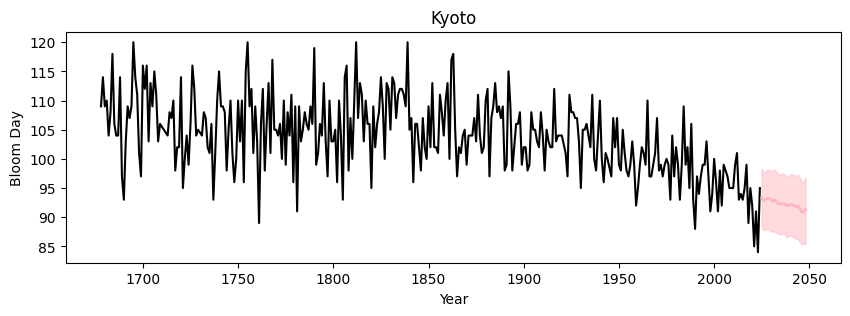

In [317]:
plt.figure(figsize=(10,3))
plt.plot(new_df['timestamp'],new_df['target'],'k-')
#plt.plot(pred_df['timestamp'],pred_df['predictions'],'.',c='lightpink')
plt.plot(pred_df['timestamp'],pred_df['0.5'],'-',lw=2,c='lightpink')
plt.fill_between(pred_df['timestamp'],pred_df['0.1'],y2=pred_df['0.9'],color='lightpink',alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Bloom Day')
plt.title('Kyoto')
plt.savefig('kyoto_pred.pdf')